In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
df_ctgan = pd.read_csv('data_ctgan_T2.csv')
df_ganblrpp = pd.read_csv('data_ganblrpp.csv')
df_copula_gan = pd.read_csv('data_copula_gan.csv')
df_castgan = pd.read_csv("data_castgan.csv")


In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
# Plotting
plt.figure(figsize=(14, 6))

# Original Data - Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(df[' Average Packet Size'], kde=True, color='blue', label='Original Data', stat='density', bins=50)
plt.title('Original Data -  Average Packet Size')
plt.xlabel(' Average Packet Size')
plt.ylabel('Density')
plt.legend()

# CASTGAN Data - Histogram and KDE
plt.subplot(1, 2, 2)
sns.histplot(df_castgan[' Average Packet Size'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)
plt.title('CASTGAN -  Average Packet Size')
plt.xlabel(' Average Packet Size')
plt.ylabel('Density')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:


# Plotting
plt.figure(figsize=(14, 6))

# Original Data - Histogram and KDE
plt.subplot(1, 2, 1)
sns.histplot(df[' Average Packet Size'], kde=True, color='blue', label='Original Data', stat='density', bins=50)
sns.histplot(data_castgan[' Average Packet Size'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)

plt.title('Original Data -  Average Packet Size')
plt.xlabel(' Average Packet Size')
plt.ylabel('Density')
plt.legend()

# CASTGAN Data - Histogram and KDE
plt.subplot(1, 2, 2)
sns.histplot(data_castgan[' Average Packet Size'], kde=True, color='red', label='CASTGAN', stat='density', bins=50)
plt.title('CASTGAN -  Average Packet Size')
plt.xlabel(' Average Packet Size')
plt.ylabel('Density')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
df_castgan.head()

In [ ]:
df.head()

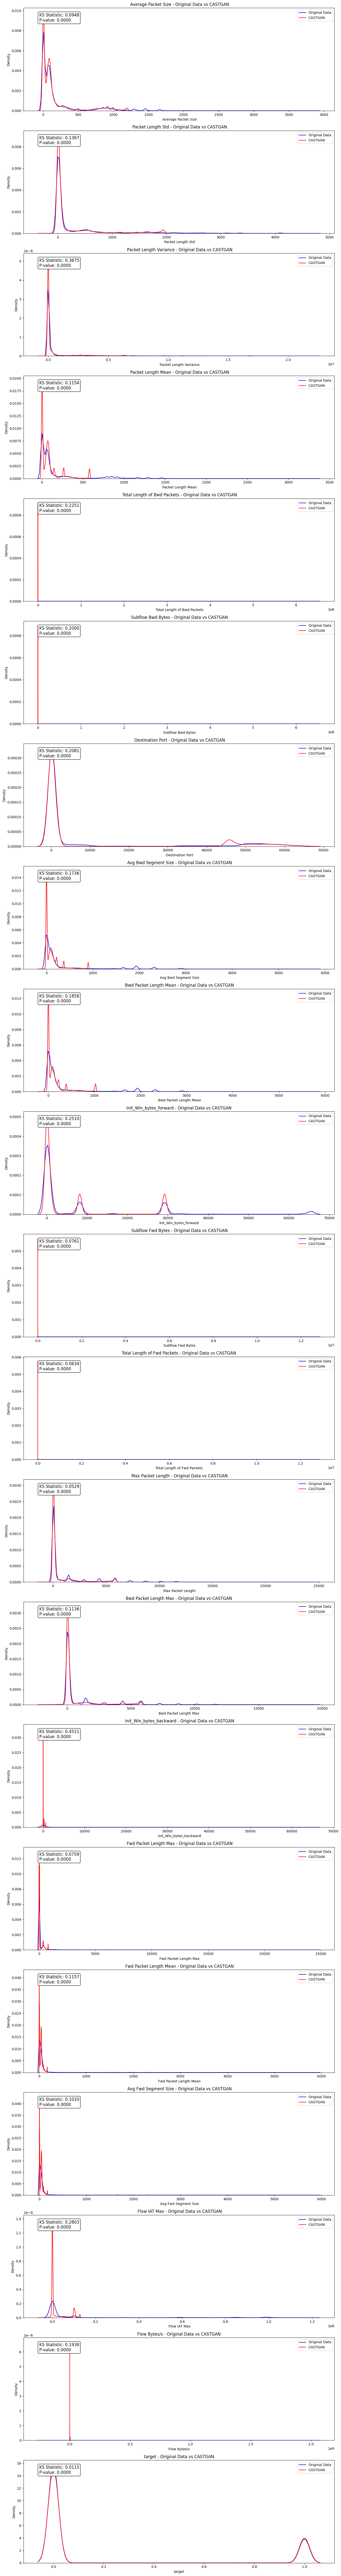

In [2]:


# List of features (column names)
features = df.columns

# Create a figure with subplots
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(14, 5 * num_features), sharex=False, sharey=False)

for i, feature in enumerate(features):
    # Perform KS test
    ks_statistic, p_value = stats.ks_2samp(df[feature], df_castgan[feature])

    # Plot KDE for the original data
    sns.kdeplot(df[feature], color='blue', label='Original Data', ax=axes[i])

    # Plot KDE for the CASTGAN data
    sns.kdeplot(df_castgan[feature], color='red', label='CASTGAN', ax=axes[i])

    # Customize each subplot
    axes[i].set_title(f'{feature} - Original Data vs CASTGAN')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()

    # Annotate with KS statistic and p-value
    axes[i].text(0.05, 0.95, f'KS Statistic: {ks_statistic:.4f}\nP-value: {p_value:.4f}',
                 transform=axes[i].transAxes, fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust layout
plt.tight_layout()
plt.show()


In [3]:
# List of features (column names)
features = df.columns

# List of synthetic dataframes and their titles
synthetic_datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Create a figure with subplots
num_features = len(features)
num_datasets = len(synthetic_datasets)
fig, axes = plt.subplots(num_features, num_datasets, figsize=(14 * num_datasets, 5 * num_features), sharex=False, sharey=False)

for i, feature in enumerate(features):
    for j, (synthetic_data, title) in enumerate(zip(synthetic_datasets, titles)):
        # Perform KS test
        ks_statistic, p_value = stats.ks_2samp(df[feature], synthetic_data[feature])
        
        # Plot KDE for the original data
        sns.kdeplot(df[feature], color='blue', label='Original Data', ax=axes[i, j])
        
        # Plot KDE for the synthetic data
        sns.kdeplot(synthetic_data[feature], color='red', label=title, ax=axes[i, j])
        
        # Customize each subplot
        axes[i, j].set_title(f'{feature} - Original Data vs {title}')
        axes[i, j].set_xlabel(feature)
        axes[i, j].set_ylabel('Density')
        axes[i, j].legend()
        
        # Annotate with KS statistic and p-value
        #axes[i, j].text(0.05, 0.95, f'KS Statistic: {ks_statistic:.4f}\nP-value: {p_value:.4f}',
         #               transform=axes[i, j].transAxes, fontsize=12, verticalalignment='top', 
          #              bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white'))

# Adjust layout
plt.tight_layout()
plt.show()


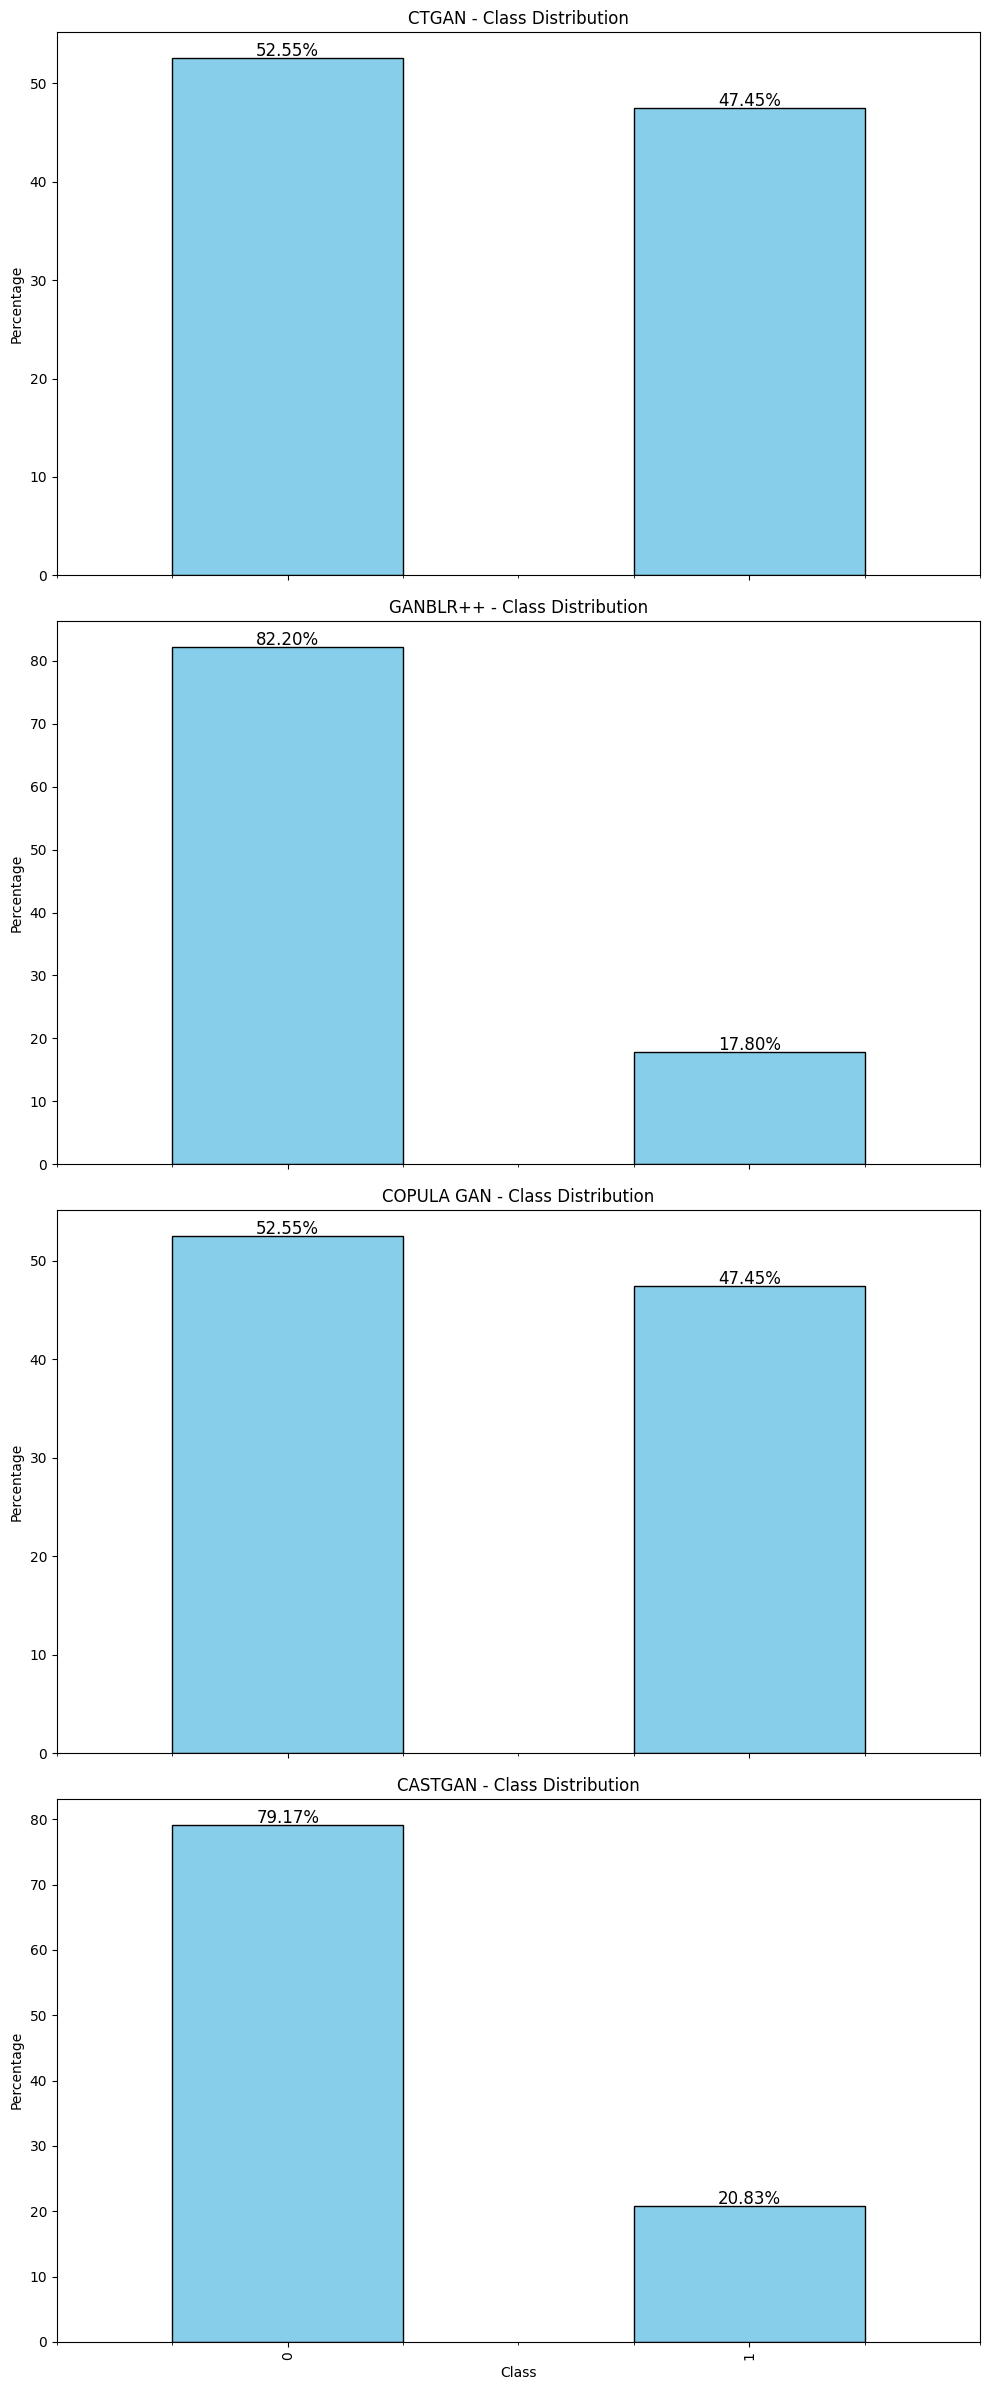


CTGAN - Class Proportions:
target
0    52.546858
1    47.453142
Name: proportion, dtype: float64

GANBLR++ - Class Proportions:
target
0    82.2
1    17.8
Name: proportion, dtype: float64

COPULA GAN - Class Proportions:
target
0    52.546894
1    47.453106
Name: proportion, dtype: float64

CASTGAN - Class Proportions:
target
0    79.165211
1    20.834789
Name: proportion, dtype: float64


In [4]:
# List of features (column names)
features = df.columns

# List of synthetic dataframes and their titles
datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Target column name (replace 'target' with your actual target column name)
target_column = 'target'

# Plotting class distribution
fig, axes = plt.subplots(len(datasets), 1, figsize=(10, 6 * len(datasets)), sharex=True)

for i, (data, title) in enumerate(zip(datasets, titles)):
    class_counts = data[target_column].value_counts(normalize=True) * 100  # Get class distribution in percentage
    class_counts.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    
    # Annotate the bars with percentage values
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), 
                         textcoords='offset points')
    
    axes[i].set_title(f'{title} - Class Distribution')
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()
plt.show()

# Print the proportions numerically
for data, title in zip(datasets, titles):
    print(f"\n{title} - Class Proportions:")
    class_counts = data[target_column].value_counts(normalize=True) * 100
    print(class_counts)


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# List of synthetic dataframes and their titles
datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

# Target column name (replace 'target' with your actual target column name)
target_column = 'target'

# Features and target for the original dataset
X_real = df.drop(columns=[target_column])
y_real = df[target_column]

# Split the original data into train and test sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# Train and test on real data (TRTR)
model_real = RandomForestClassifier(random_state=42)
model_real.fit(X_train_real, y_train_real)
y_pred_real = model_real.predict(X_test_real)
accuracy_real = accuracy_score(y_test_real, y_pred_real)
print(f'TRTR (Train and Test on Real) Accuracy: {accuracy_real:.4f}')

# Train on synthetic data and test on real data (TSTR)
accuracies = {}

for data, title in zip(datasets, titles):
    X_synth = data.drop(columns=[target_column])
    y_synth = data[target_column]
    
    model_synth = RandomForestClassifier(random_state=42)
    model_synth.fit(X_synth, y_synth)  # Train on synthetic data
    y_pred_synth = model_synth.predict(X_test_real)  # Test on real data
    accuracy_synth = accuracy_score(y_test_real, y_pred_synth)
    accuracies[title] = accuracy_synth
    print(f'TSTR (Train on {title}, Test on Real) Accuracy: {accuracy_synth:.4f}')

# Compare accuracies
comparison_df = pd.DataFrame({'Dataset': ['TRTR'] + titles, 'Accuracy': [accuracy_real] + list(accuracies.values())})
print('\nAccuracy Comparison:')
print(comparison_df)


TRTR (Train and Test on Real) Accuracy: 0.9978
TSTR (Train on CTGAN, Test on Real) Accuracy: 0.9531
TSTR (Train on GANBLR++, Test on Real) Accuracy: 0.5378
TSTR (Train on COPULA GAN, Test on Real) Accuracy: 0.9755
TSTR (Train on CASTGAN, Test on Real) Accuracy: 0.9734

Accuracy Comparison:
      Dataset  Accuracy
0        TRTR  0.997819
1       CTGAN  0.953129
2    GANBLR++  0.537832
3  COPULA GAN  0.975473
4     CASTGAN  0.973398


In [6]:

# List of synthetic dataframes and their titles
datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

for title, df in zip(titles, datasets):
    print(f"Dataset: {title}")
    print("Column-wise Min and Max values:")
    
    # Display the minimum values for each column
    print("Minimum values:")
    print(df.min())

    # Display the maximum values for each column
    print("\nMaximum values:")
    print(df.max())
    
    print("\n" + "="*50 + "\n")  # Add a separator between datasets for better readability


Dataset: CTGAN
Column-wise Min and Max values:
Minimum values:
 Average Packet Size            0.000000e+00
 Packet Length Std              0.000000e+00
 Packet Length Variance         0.000000e+00
 Packet Length Mean             0.000000e+00
 Total Length of Bwd Packets    0.000000e+00
 Subflow Bwd Bytes              0.000000e+00
 Destination Port               0.000000e+00
 Avg Bwd Segment Size           0.000000e+00
 Bwd Packet Length Mean         0.000000e+00
Init_Win_bytes_forward         -1.000000e+00
 Subflow Fwd Bytes              0.000000e+00
Total Length of Fwd Packets     0.000000e+00
 Max Packet Length              0.000000e+00
Bwd Packet Length Max           0.000000e+00
 Init_Win_bytes_backward       -1.000000e+00
 Fwd Packet Length Max          0.000000e+00
 Fwd Packet Length Mean         0.000000e+00
 Avg Fwd Segment Size           0.000000e+00
 Flow IAT Max                  -1.300000e+01
Flow Bytes/s                   -3.499149e+06
target                          0.000

In [5]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('imp_final_df.csv')  # Original DataFrame
df_ctgan = pd.read_csv('data_ctgan_T2.csv')
df_ganblrpp = pd.read_csv('data_ganblrpp.csv')
df_copula_gan = pd.read_csv('data_copula_gan.csv')
df_castgan = pd.read_csv("data_castgan.csv")


# List of features (column names)
features = df.columns

# List of synthetic dataframes and their titles
datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]
target_column = 'target'

# Features and target for the original dataset
# Assuming 'df' is defined in the environment
X_real = df.drop(columns=[target_column])
y_real = df[target_column]

# Split the original data into train and test sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(X_real, y_real, test_size=0.3, random_state=42)

# --- Train and Test on Real Data (TRTR) ---
model_real = RandomForestClassifier(random_state=42)
model_real.fit(X_train_real, y_train_real)
y_pred_real = model_real.predict(X_test_real)

# Calculate all metrics for TRTR
accuracy_real = accuracy_score(y_test_real, y_pred_real)
f1_real = f1_score(y_test_real, y_pred_real, average='weighted')
recall_real = recall_score(y_test_real, y_pred_real, average='weighted')
precision_real = precision_score(y_test_real, y_pred_real, average='weighted')

print(f'TRTR (Train and Test on Real) Accuracy: {accuracy_real:.4f}')

# --- Train on Synthetic Data and Test on Real Data (TSTR) ---
# Assuming 'datasets' and 'titles' are defined in the environment
all_results = {}

for data, title in zip(datasets, titles):
    X_synth = data.drop(columns=[target_column])
    y_synth = data[target_column]
    
    # Reindex X_synth to match the order of X_test_real
    X_synth = X_synth.reindex(columns=X_test_real.columns)
    
    model_synth = RandomForestClassifier(random_state=42)
    model_synth.fit(X_synth, y_synth)  # Train on synthetic data
    y_pred_synth = model_synth.predict(X_test_real)  # Test on real data
    
    # Calculate all metrics for TSTR
    accuracy_synth = accuracy_score(y_test_real, y_pred_synth)
    f1_synth = f1_score(y_test_real, y_pred_synth, average='weighted')
    recall_synth = recall_score(y_test_real, y_pred_synth, average='weighted')
    precision_synth = precision_score(y_test_real, y_pred_synth, average='weighted')
    
    all_results[title] = {
        'Accuracy': accuracy_synth,
        'F1-Score': f1_synth,
        'Recall': recall_synth,
        'Precision': precision_synth
    }
    
    print(f'TSTR (Train on {title}, Test on Real) Accuracy: {accuracy_synth:.4f}')

# --- Compare All Metrics ---
results_list = []

# Add TRTR result
results_list.append({
    'Dataset': 'TRTR',
    'Accuracy': accuracy_real,
    'F1-Score': f1_real,
    'Recall': recall_real,
    'Precision': precision_real
})

# Add TSTR results
for title, metrics in all_results.items():
    results_list.append({
        'Dataset': title,
        'Accuracy': metrics['Accuracy'],
        'F1-Score': metrics['F1-Score'],
        'Recall': metrics['Recall'],
        'Precision': metrics['Precision']
    })

comparison_df = pd.DataFrame(results_list)
print('\nComplete Metric Comparison:')
print(comparison_df)

TRTR (Train and Test on Real) Accuracy: 0.9978
TSTR (Train on CTGAN, Test on Real) Accuracy: 0.9531
TSTR (Train on GANBLR++, Test on Real) Accuracy: 0.5378
TSTR (Train on COPULA GAN, Test on Real) Accuracy: 0.9755
TSTR (Train on CASTGAN, Test on Real) Accuracy: 0.9734

Complete Metric Comparison:
      Dataset  Accuracy  F1-Score    Recall  Precision
0        TRTR  0.997819  0.997820  0.997819   0.997820
1       CTGAN  0.953129  0.954613  0.953129   0.959717
2    GANBLR++  0.537832  0.584337  0.537832   0.678150
3  COPULA GAN  0.975473  0.975781  0.975473   0.976630
4     CASTGAN  0.973398  0.973744  0.973398   0.974667


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from scipy import stats
import numpy as np

# List of synthetic dataframes and their titles
datasets = [df_ctgan, df_ganblrpp, df_copula_gan, df_castgan]
titles = ["CTGAN", "GANBLR++", "COPULA GAN", "CASTGAN"]

target_column = 'target' 
NUM_RUNS = 20  # Number of repetitions for statistical significance
TEST_SIZE = 0.3 
ALPHA = 0.05   

# X_real, y_real are derived from df
X_real = df.drop(columns=[target_column])
y_real = df[target_column]

# Dictionary to store all results: {method: {'accuracy': [scores], 'f1': [scores]}}
all_run_metrics = {}

# --- A. Repeated Experiment Loop (The Core Change) ---
print(f"Starting repeated experiment ({NUM_RUNS} runs) to gather metrics...")
TRTR_KEY = 'TRTR_Baseline'

for run in range(NUM_RUNS):
    # CRITICAL: Use a different random state for each run
    random_seed = 42 + run
    
    # 1. Split the original data (ensures a new test set each run)
    X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(
        X_real, y_real, test_size=TEST_SIZE, random_state=random_seed
    )
    
    # Ensure target data types are correct (e.g., convert to int for classification)
    y_train_real = y_train_real.astype(int)
    y_test_real = y_test_real.astype(int)

    # 2. TRTR: Train and Test on Real data (Baseline for the current split)
    model_trtr = RandomForestClassifier(random_state=random_seed, n_jobs=-1)
    model_trtr.fit(X_train_real, y_train_real)
    y_pred_trtr = model_trtr.predict(X_test_real)
    
    # Calculate TRTR Metrics
    accuracy_trtr = accuracy_score(y_test_real, y_pred_trtr)
    f1_trtr = f1_score(y_test_real, y_pred_trtr, average='weighted')
    
    # Store the TRTR metrics
    if TRTR_KEY not in all_run_metrics:
        all_run_metrics[TRTR_KEY] = {'accuracy': [], 'f1': []}
    all_run_metrics[TRTR_KEY]['accuracy'].append(accuracy_trtr)
    all_run_metrics[TRTR_KEY]['f1'].append(f1_trtr)

    # 3. TSTR: Loop through each synthetic dataset
    for data, title in zip(datasets, titles):
        X_synth = data.drop(columns=[target_column])
        y_synth = data[target_column].astype(int)
        
        # Ensure feature alignment
        X_synth = X_synth.reindex(columns=X_test_real.columns)
        
        # TSTR: Train on synthetic, Test on real (using the same X_test_real as TRTR)
        model_tstr = RandomForestClassifier(random_state=random_seed, n_jobs=-1)
        model_tstr.fit(X_synth, y_synth)
        y_pred_tstr = model_tstr.predict(X_test_real)

        # Calculate TSTR Metrics
        accuracy_tstr = accuracy_score(y_test_real, y_pred_tstr)
        f1_tstr = f1_score(y_test_real, y_pred_tstr, average='weighted')

        # Initialize dictionary entry if method is new
        if title not in all_run_metrics:
            all_run_metrics[title] = {'accuracy': [], 'f1': []}
        
        # Store the TSTR metrics for this run
        all_run_metrics[title]['accuracy'].append(accuracy_tstr)
        all_run_metrics[title]['f1'].append(f1_tstr)

# --- B. Statistical Significance Testing and Reporting ---

# Get the common TRTR baseline metrics
trtr_accuracies = np.array(all_run_metrics[TRTR_KEY]['accuracy'])
trtr_f1s = np.array(all_run_metrics[TRTR_KEY]['f1'])

# Calculate TRTR Mean and SD
mean_trtr_acc = np.mean(trtr_accuracies)
std_trtr_acc = np.std(trtr_accuracies)
mean_trtr_f1 = np.mean(trtr_f1s)
std_trtr_f1 = np.std(trtr_f1s)

final_comparison_results = []

# Add TRTR baseline entry first
final_comparison_results.append({
    'Method': TRTR_KEY,
    'Accuracy (Mean ± SD)': f"{mean_trtr_acc:.4f} ± {std_trtr_acc:.4f}",
    'F1-Score (Mean ± SD)': f"{mean_trtr_f1:.4f} ± {std_trtr_f1:.4f}",
    'Acc. Sig. vs TRTR (p)': 'Baseline',
    'F1 Sig. vs TRTR (p)': 'Baseline'
})

for title in titles:
    tstr_accuracies = np.array(all_run_metrics[title]['accuracy'])
    tstr_f1s = np.array(all_run_metrics[title]['f1'])
    
    # --- Accuracy T-Test ---
    mean_tstr_acc = np.mean(tstr_accuracies)
    std_tstr_acc = np.std(tstr_accuracies)
    t_stat_acc, p_value_acc = stats.ttest_rel(tstr_accuracies, trtr_accuracies)
    sig_acc = f"{p_value_acc:.4f} (Sig.)" if p_value_acc < ALPHA else f"{p_value_acc:.4f} (Not Sig.)"
    
    # --- F1-Score T-Test ---
    mean_tstr_f1 = np.mean(tstr_f1s)
    std_tstr_f1 = np.std(tstr_f1s)
    t_stat_f1, p_value_f1 = stats.ttest_rel(tstr_f1s, trtr_f1s)
    sig_f1 = f"{p_value_f1:.4f} (Sig.)" if p_value_f1 < ALPHA else f"{p_value_f1:.4f} (Not Sig.)"

    # Record the result
    final_comparison_results.append({
        'Method': title,
        'Accuracy (Mean ± SD)': f"{mean_tstr_acc:.4f} ± {std_tstr_acc:.4f}",
        'F1-Score (Mean ± SD)': f"{mean_tstr_f1:.4f} ± {std_tstr_f1:.4f}",
        'Acc. Sig. vs TRTR (p)': sig_acc,
        'F1 Sig. vs TRTR (p)': sig_f1
    })

# Create the final comparison table
comparison_df_stats = pd.DataFrame(final_comparison_results)
print('\n--- Statistical Significance Comparison Table (N={}) ---'.format(NUM_RUNS))
print(comparison_df_stats.to_string())

Starting repeated experiment (20 runs) to gather metrics...

--- Statistical Significance Comparison Table (N=20) ---
          Method Accuracy (Mean ± SD) F1-Score (Mean ± SD) Acc. Sig. vs TRTR (p) F1 Sig. vs TRTR (p)
0  TRTR_Baseline      0.9978 ± 0.0001      0.9978 ± 0.0001              Baseline            Baseline
1          CTGAN      0.9529 ± 0.0007      0.9544 ± 0.0007         0.0000 (Sig.)       0.0000 (Sig.)
2       GANBLR++      0.7342 ± 0.0665      0.7232 ± 0.0418         0.0000 (Sig.)       0.0000 (Sig.)
3     COPULA GAN      0.9757 ± 0.0005      0.9760 ± 0.0005         0.0000 (Sig.)       0.0000 (Sig.)
4        CASTGAN      0.9731 ± 0.0005      0.9734 ± 0.0004         0.0000 (Sig.)       0.0000 (Sig.)
